In [62]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
import pprint
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm

from cadf import *

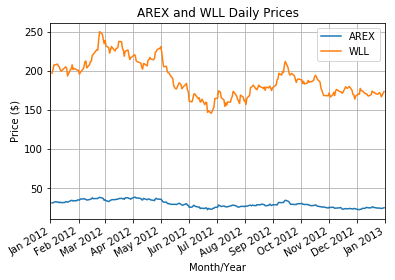

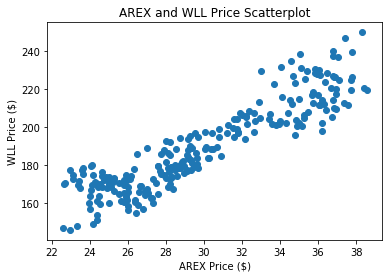

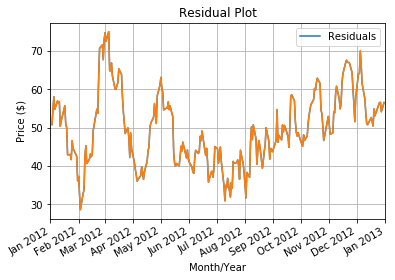

(-3.0535661286364246,
 0.030185851946442927,
 0,
 249,
 {'1%': -3.4568881317725864,
  '10%': -2.5729936189738876,
  '5%': -2.8732185133016057},
 1253.7398673345226)


In [70]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2013, 1, 1)

arex = web.DataReader("AREX", "quandl", start, end)
wll = web.DataReader("WLL", "quandl", start, end)

df = pd.DataFrame(index=arex.index)
df["AREX"] = arex["AdjClose"]
df["WLL"] = wll["AdjClose"]

# Plot the two time series
plot_price_series(df, "AREX", "WLL")

# Display a scatter plot of the two time series
plot_scatter_series(df, "AREX", "WLL")

# Calculate optimal hedge ratio "beta"
res = sm.regression.linear_model.OLS(df['WLL'].values, sm.add_constant(df["AREX"].values)).fit()
beta_hr = res.params[1]

# Calculate the residuals of the linear combination
df["res"] = df["WLL"] - beta_hr*df["AREX"]

# Plot the residuals
plot_residuals(df)

# Calculate and output the CADF test on the residuals
cadf = ts.adfuller(df["res"])
pprint.pprint(cadf)